In [342]:
# Import packages
import panel as pn
import pandas as pd
import numpy as np
pn.extension('plotly')
import plotly.express as px
import hvplot.pandas
import matplotlib.pyplot as plt
import os
from dotenv import load_dotenv
from panel.interact import interact
from panel import widgets


In [343]:
# Read from URL
df_2017 = pd.read_html('https://en.wikipedia.org/wiki/2017_Formula_One_World_Championship')
df_2018 = pd.read_html('https://en.wikipedia.org/wiki/2018_Formula_One_World_Championship')
df_2019 = pd.read_html('https://en.wikipedia.org/wiki/2019_Formula_One_World_Championship')
df_2020 = pd.read_html('https://en.wikipedia.org/wiki/2020_Formula_One_World_Championship')
df_2021 = pd.read_html('https://en.wikipedia.org/wiki/2021_Formula_One_World_Championship')


In [509]:
# Create 5 years of event schedule in dataframes, drop extraneous rows and set index
event_schedule_2017 = df_2017[1].drop(index=20).set_index('Round')
event_schedule_2017 = event_schedule.assign(Year = '2017')

event_schedule_2018 = df_2018[1].drop(index=21).set_index('Round')
event_schedule_2018 = event_schedule.assign(Year = '2018')

event_schedule_2019 = df_2019[1].drop(index=21).set_index('Round')
event_schedule_2019 = event_schedule.assign(Year = '2019')

event_schedule_2020 = df_2020[1].drop(index=17).set_index('Round')
event_schedule_2020 = event_schedule.assign(Year = '2020')

event_schedule_2021 = df_2021[1].drop(index=22).set_index('Round')
event_schedule_2021 = event_schedule.assign(Year = '2021')


In [510]:
# Create 5 years of event results in dataframes, drop extraneous rows and set index
event_result_2017 = df_2017[3].drop(index=20, axis=1).iloc[:,:-1].set_index('Round')

event_result_2018 = df_2018[2].drop(index=21, axis=1).iloc[:,:-1].set_index('Round')

event_result_2019 = df_2019[3].drop(index=21, axis=1).iloc[:,:-1].set_index('Round')

event_result_2020 = df_2020[3].drop(index=17, axis=1).iloc[:,:-1].set_index('Round')

event_result_2021 = df_2021[3].drop(index=22, axis=1).iloc[:,:-1].set_index('Round')

# Rename header
event_result_2021 = event_result_2021.rename(columns={'Pole position[q]':'Pole position'})

In [511]:
#Concatenate event schedule and result dataframes, drop column not needed

event_table_2017 = pd.concat([event_schedule_2017, event_result_2017],axis='columns', join='inner')
event_table_2017 = event_table_2017.drop(event_table_2017.columns[0], axis=1)

event_table_2018 = pd.concat([event_schedule_2018, event_result_2018],axis='columns', join='inner')
event_table_2018 = event_table_2018.drop(event_table_2018.columns[0], axis=1)

event_table_2019 = pd.concat([event_schedule_2019, event_result_2019],axis='columns', join='inner')
event_table_2019 = event_table_2019.drop(event_table_2019.columns[0], axis=1)

event_table_2020 = pd.concat([event_schedule_2020, event_result_2020],axis='columns', join='inner')
event_table_2020 = event_table_2020.drop(event_table_2020.columns[0], axis=1)

event_table_2021 = pd.concat([event_schedule_2021, event_result_2021],axis='columns', join='inner')
event_table_2021 = event_table_2021.drop(event_table_2021.columns[0], axis=1)

In [512]:
# Split header 'Circuit' into 2 separate columns of Circuit Name and City, rename column headers
circuit_expanded_2017= event_table_2017['Circuit'].str.split(',', expand=True)
circuit_expanded_2017=circuit_expanded_2017.iloc[:,:-1]
circuit_expanded_2017=circuit_expanded_2017.rename(columns={0:'Circuit Name',1:'City'})

circuit_expanded_2018= event_table_2018['Circuit'].str.split(',', expand=True)
circuit_expanded_2018=circuit_expanded_2018.iloc[:,:-1]
circuit_expanded_2018=circuit_expanded_2018.rename(columns={0:'Circuit Name',1:'City'})

circuit_expanded_2019= event_table_2019['Circuit'].str.split(',', expand=True)
circuit_expanded_2019=circuit_expanded_2019.iloc[:,:-1]
circuit_expanded_2019=circuit_expanded_2019.rename(columns={0:'Circuit Name',1:'City'})

circuit_expanded_2020= event_table_2020['Circuit'].str.split(',', expand=True)
circuit_expanded_2020=circuit_expanded_2020.iloc[:,:-1]
circuit_expanded_2020=circuit_expanded_2020.rename(columns={0:'Circuit Name',1:'City'})

circuit_expanded_2021= event_table_2021['Circuit'].str.split(',', expand=True)
circuit_expanded_2021=circuit_expanded_2021.iloc[:,:-1]
circuit_expanded_2021=circuit_expanded_2021.rename(columns={0:'Circuit Name',1:'City'})

In [513]:
# Concatenate dataframes - Event table and Circuit
event_table_2017r=pd.concat([event_table_2017, circuit_expanded_2017], axis='columns', join='inner')

event_table_2018r=pd.concat([event_table_2018, circuit_expanded_2018], axis='columns', join='inner')

event_table_2019r=pd.concat([event_table_2019, circuit_expanded_2019], axis='columns', join='inner')

event_table_2020r=pd.concat([event_table_2020, circuit_expanded_2020], axis='columns', join='inner')

event_table_2021r=pd.concat([event_table_2021, circuit_expanded_2021], axis='columns', join='inner')

In [514]:
#Create master dataframe for plot by merging event df and circuit df
master_table_2017 = pd.merge(left=event_table_2017r, right=df, how='left', left_on='Circuit Name', right_on='Name')

master_table_2018 = pd.merge(left=event_table_2018r, right=df, how='left', left_on='Circuit Name', right_on='Name')

master_table_2019 = pd.merge(left=event_table_2019r, right=df, how='left', left_on='Circuit Name', right_on='Name')

master_table_2020 = pd.merge(left=event_table_2020r, right=df, how='left', left_on='Circuit Name', right_on='Name')

master_table_2021 = pd.merge(left=event_table_2021r, right=df, how='left', left_on='Circuit Name', right_on='Name')

In [444]:
#Append master dataframe for each year into a main master dataframe containing all 5 years of data
master_table = master_table_2017.append(master_table_2018, ignore_index=False)
master_table = master_table.append(master_table_2019, ignore_index=False)
master_table = master_table.append(master_table_2020, ignore_index=False)
master_table = master_table.append(master_table_2021, ignore_index=False)
master_table

,Circuit,Date,Year,Pole position,Fastest lap,Winning driver,Winning constructor,Circuit Name,City,Name,Location,Country,Latitude,Longitude,Altitude (m),N. races,Wikipedia
0,"Albert Park Circuit, Melbourne",26 March,2017,Lewis Hamilton,Kimi Räikkönen,Sebastian Vettel,Ferrari,Albert Park Circuit,Melbourne,Albert Park Circuit,Melbourne,Australia,-37.8497,144.96800,0.0,25.0,Link
1,"Shanghai International Circuit, Shanghai",9 April,2017,Lewis Hamilton,Lewis Hamilton,Lewis Hamilton,Mercedes,Shanghai International Circuit,Shanghai,Shanghai International Circuit,Shanghai,China,31.3389,121.22000,5.0,16.0,Link
2,"Bahrain International Circuit, Sakhir",16 April,2017,Valtteri Bottas,Lewis Hamilton,Sebastian Vettel,Ferrari,Bahrain International Circuit,Sakhir,Bahrain International Circuit,Sakhir,Bahrain,26.0325,50.51060,0.0,19.0,Link
3,"Sochi Autodrom, Sochi",30 April,2017,Sebastian Vettel,Kimi Räikkönen,Valtteri Bottas,Mercedes,Sochi Autodrom,Sochi,Sochi Autodrom,Sochi,Russia,43.4057,39.95780,0.0,8.0,Link
4,"Circuit de Barcelona-Catalunya, Barcelona",14 May,2017,Lewis Hamilton,Lewis Hamilton,Lewis Hamilton,Mercedes,Circuit de Barcelona-Catalunya,Barcelona,Circuit de Barcelona-Catalunya,Montmeló,Spain,41.5700,2.26111,0.0,32.0,Link
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15,"Suzuka International Racing Course, Suzuka",8 October,2021,Valtteri Bottas[t],Valtteri Bottas,Valtteri Bottas,Mercedes,Suzuka International Racing Course,Suzuka,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,"Circuit of the Americas, Austin, Texas",22 October,2021,Max Verstappen,Lewis Hamilton,Max Verstappen,Red Bull Racing-Honda,Circuit of the Americas,Austin,Circuit of the Americas,Austin,USA,30.1328,-97.64110,0.0,10.0,Link
17,"Autódromo Hermanos Rodríguez, Mexico City",29 October,2021,Valtteri Bottas,Valtteri Bottas,Max Verstappen,Red Bull Racing-Honda,Autódromo Hermanos Rodríguez,Mexico City,Autódromo Hermanos Rodríguez,Mexico City,Mexico,19.4042,-99.09070,0.0,22.0,Link
18,"Autódromo José Carlos Pace, São Paulo",12 November,2021,Valtteri Bottas,Sergio Pérez,Lewis Hamilton,Mercedes,Autódromo José Carlos Pace,São Paulo,Autódromo José Carlos Pace,São Paulo,Brazil,-23.7036,-46.69970,0.0,39.0,Link


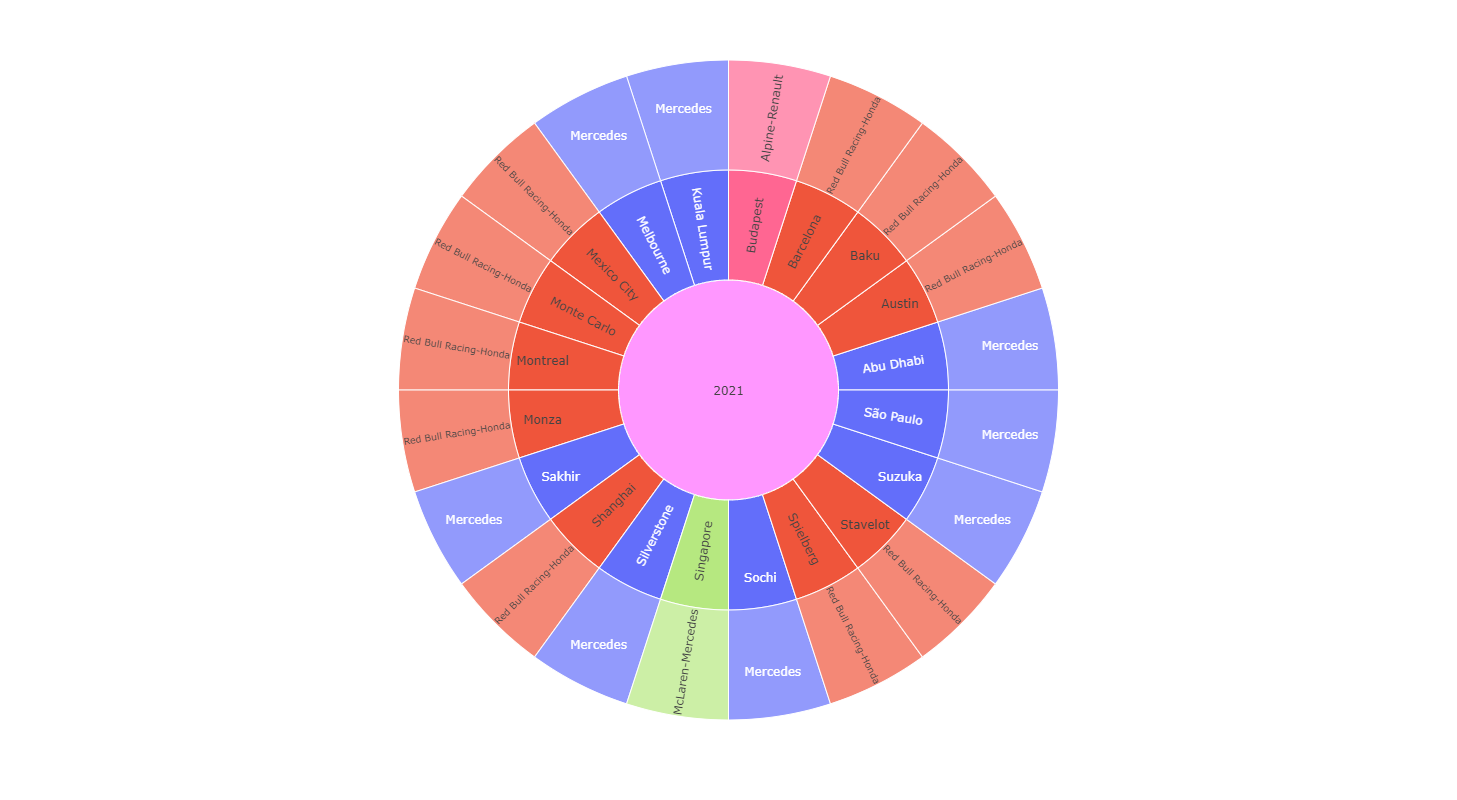

In [445]:
#Plot sunburst chart of Winning Constructor by Year, by event
plot_constructor = px.sunburst(
    master_table, path=['Year','City','Winning constructor'], 
    width=1000, 
    height=800, 
    color='Winning constructor', 
    hover_data=['Fastest lap','Pole position','Winning driver'])
plot_constructor.show()

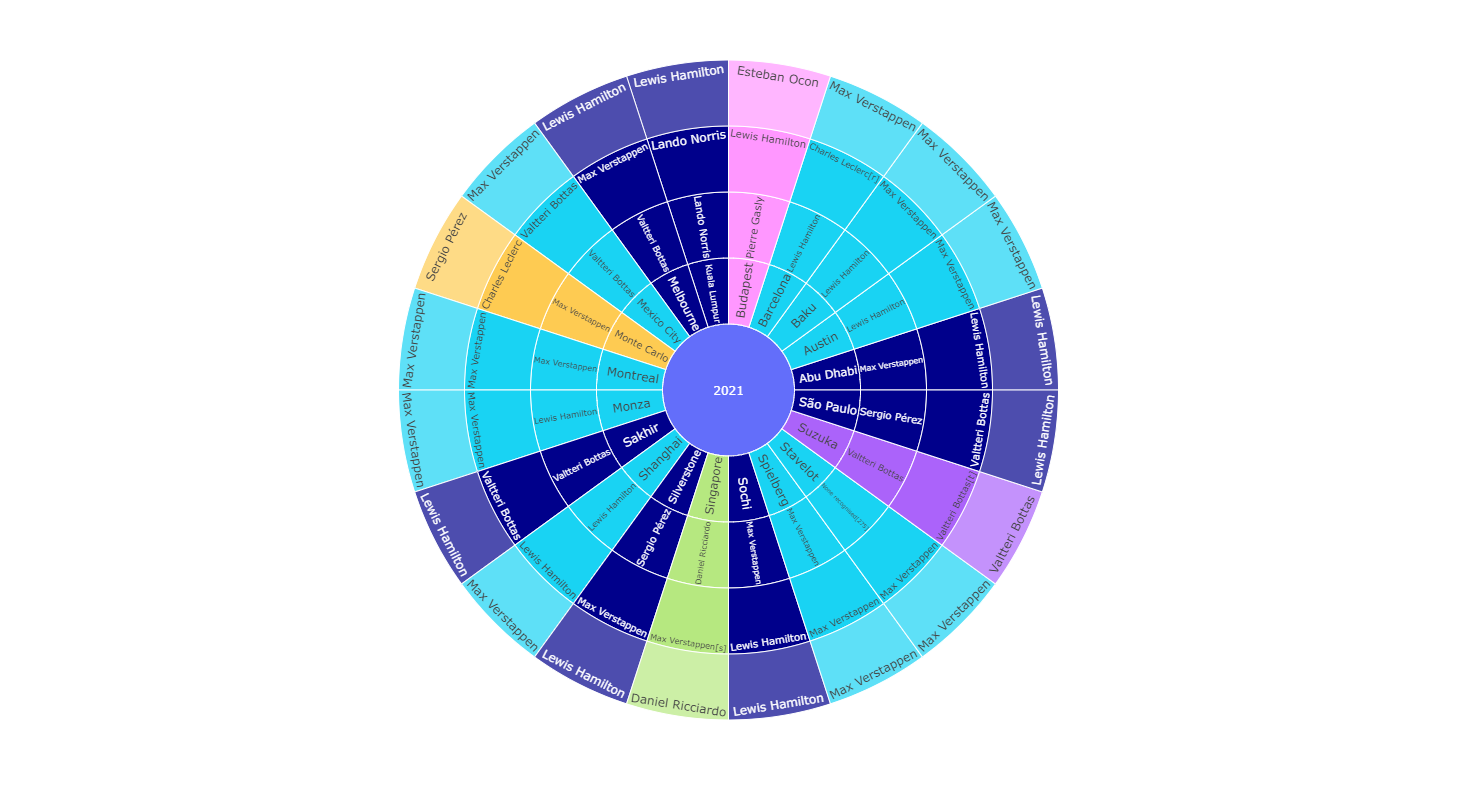

In [446]:
#Plot sunburst chart of fastest driver, driver in pole position and winning driver by event, by year
plot_driver = px.sunburst(
    master_table, 
    path=['Year','City','Fastest lap','Pole position','Winning driver'],
    width=1000, 
    height=800, 
    color='Winning driver', 
    hover_data=['Winning constructor'],
    color_discrete_map={'Lewis Hamilton':'black', 'Sebastian Vettel':'gold', 'Lewis Hamilton':'darkblue'}
)
plot_driver.show()

In [5]:
#Import path
from pathlib import Path

In [6]:
#Create path
f1_circuits_path = Path ('f1_circuits.csv')

In [516]:
# Read csv file downloaded from web with latitude and longitude info
df=pd.read_csv(f1_circuits_path)
# Rename an item to be consistent for dataframe merge later
df.loc[78,'Name']=['Albert Park Circuit']

In [517]:
#Read from URL and rename column to avoid duplicate
circuit_info=pd.read_html('https://en.wikipedia.org/wiki/List_of_Formula_One_circuits')
circuits = circuit_info[2].rename(columns={'Location':'Loc'})

In [518]:
# Split header in dataframe into 2 separate columns, City and Country for dataframe merge
circuits1 = circuits.iloc[:,4].str.split(',', expand=True)
circuits1 = circuits1.rename(columns={0:'City',1:'Ctry'})

In [248]:
circuits_r=pd.concat([circuits,circuits1], axis='columns', join='inner').copy()
circuits_r
cir_r=circuits_r.replace({'Aintree':'Liverpool', 
                          'Scarperia e San Piero':'Mugello',
                          'West Kingsdown':'Kent', 
                          'Greater Noida': 'Uttar Pradesh', 
                          'Saint-Genès-Champanelle':'Clermont-Ferrand', 
                          'Monte Carlo': 'Monte-Carlo', 
                          'Magny-Cours':'Magny Cours',
                          'Gueux':'Reims',
                          'Prenois':'Dijon',
                          'Mont-Tremblant':'Quebec',
                          'Porto':'Oporto',
                          'San Sebastián de los Reyes':'Jarama',
                          'Nivelles':'Brussels', 
                          'Mogyoród':'Budapest', 
                          'Speedway':'Indianapolis', 
                          'Las Vegas':'Nevada',
                          'Long Beach':'California', 
                          'Lusail': 'Al Daayen', 
                          'Miami Gardens':'Miami', 
                          'Bowmanville':'Ontario',
                          'East London':'Eastern Cape Province',
                          'Spielberg':'Spielburg', 
                          'Moreno Valley':'California', 
                          'Orival':'Rouen',
                          'Sebring':'Florida', 
                          'Sepang':'Kuala Lumpur',
                          'Jiading':'Shanghai', 
                          'Sirius':'Sochi',
                          'Watkins Glen': 'New York State', 
                          'Zeltweg':'Styria'
                         })
cir_r


,Circuit,Map,Type,Direction,Loc,Last length used,Grands Prix,Season(s),Grands Prix held,City,Ctry
0,Adelaide Street Circuit,NaN,Street circuit,Clockwise,"Adelaide, Australia",3.780 km (2.349 mi),Australian Grand Prix,1985–1995,11.0,Adelaide,Australia
1,Ain-Diab Circuit,NaN,Road circuit,Clockwise,"Casablanca, Morocco",7.618 km (4.734 mi),Moroccan Grand Prix,1958,1.0,Casablanca,Morocco
2,Aintree Motor Racing Circuit,NaN,Road circuit,Clockwise,"Aintree, United Kingdom",4.828 km (3.000 mi),British Grand Prix,"1955, 1957, 1959, 1961–1962",5.0,Liverpool,United Kingdom
3,Autódromo do Estoril,NaN,Race circuit,Clockwise,"Estoril, Portugal",4.360 km (2.709 mi),Portuguese Grand Prix,1984–1996,13.0,Estoril,Portugal
4,Autodromo Enzo e Dino Ferrari ✔,NaN,Race circuit,Anti-clockwise,"Imola, Italy",4.909 km (3.050 mi),"Italian Grand Prix,San Marino Grand Prix,Emili...","1980–2006, 2020–2021",29.0,Imola,Italy
...,...,...,...,...,...,...,...,...,...,...,...
72,TI Circuit Aida,NaN,Race circuit,Clockwise,"Mimasaka, Japan",3.703 km (2.301 mi),Pacific Grand Prix,1994–1995,2.0,Mimasaka,Japan
73,Valencia Street Circuit,NaN,Street circuit,Clockwise,"Valencia, Spain",5.419 km (3.367 mi),European Grand Prix,2008–2012,5.0,Valencia,Spain
74,Watkins Glen International,NaN,Race circuit,Clockwise,"Watkins Glen, United States",5.430 km (3.374 mi),United States Grand Prix,1961–1980,20.0,New York State,United States
75,Yas Marina Circuit ✔,NaN,Race circuit,Anti-clockwise,"Abu Dhabi, United Arab Emirates",5.281 km (3.281 mi),Abu Dhabi Grand Prix,2009–2021,13.0,Abu Dhabi,United Arab Emirates


In [250]:
# Merge dataframes to make a new dataframe with all information on circuits for plots
master_circuits=pd.merge(left=df, right=cir_r, how='left', left_on='Location', right_on='City')
master_circuits


,Name,Location,Country,Latitude,Longitude,Altitude (m),N. races,Wikipedia,Circuit,Map,Type,Direction,Loc,Last length used,Grands Prix,Season(s),Grands Prix held,City,Ctry
0,Scandinavian Raceway,Anderstorp,Sweden,57.2653,13.60420,153,6,Link,Scandinavian Raceway,NaN,Race circuit,Clockwise,"Anderstorp, Sweden",4.031 km (2.505 mi),Swedish Grand Prix,1973–1978,6.0,Anderstorp,Sweden
1,Aintree,Liverpool,UK,53.4769,-2.94056,20,5,Link,Aintree Motor Racing Circuit,NaN,Road circuit,Clockwise,"Aintree, United Kingdom",4.828 km (3.000 mi),British Grand Prix,"1955, 1957, 1959, 1961–1962",5.0,Liverpool,United Kingdom
2,Donington Park,Castle Donington,UK,52.8306,-1.37528,88,1,Link,Donington Park,NaN,Race circuit,Clockwise,"Castle Donington, United Kingdom",4.020 km (2.498 mi),European Grand Prix,1993,1.0,Castle Donington,United Kingdom
3,AVUS,Berlin,Germany,52.4806,13.25140,53,1,Link,AVUS,NaN,Road circuit,Anti-clockwise,"Berlin, Germany",8.300 km (5.157 mi),German Grand Prix,1959,1.0,Berlin,Germany
4,Circuit Park Zandvoort,Zandvoort,Netherlands,52.3888,4.54092,0,32,Link,Circuit Zandvoort ✔,NaN,Race circuit,Clockwise,"Zandvoort, Netherlands",4.259 km (2.646 mi),Dutch Grand Prix,"1952–1953, 1955, 1958–1971, 1973–1985, 2021",31.0,Zandvoort,Netherlands
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,Kyalami,Midrand,South Africa,-25.9894,28.07670,1460,20,Link,Kyalami Grand Prix Circuit,NaN,Race circuit,Anti-clockwise,"Midrand, South Africa",4.261 km (2.648 mi),South African Grand Prix,"1967–1980, 1982–1985, 1992–1993",20.0,Midrand,South Africa
80,Prince George Circuit,Eastern Cape Province,South Africa,-33.0486,27.87360,15,3,Link,Prince George Circuit,NaN,Race circuit,Clockwise,"East London, South Africa",3.920 km (2.436 mi),South African Grand Prix,"1962–1963, 1965",3.0,Eastern Cape Province,South Africa
81,Autódromo Juan y Oscar Gálvez,Buenos Aires,Argentina,-34.6943,-58.45930,8,20,Link,Autódromo Juan y Oscar Gálvez,NaN,Race circuit,Clockwise,"Buenos Aires, Argentina",4.259 km (2.646 mi),Argentine Grand Prix,"1953–1958, 1960, 1972–1975, 1977–1981, 1995–1998",20.0,Buenos Aires,Argentina
82,Adelaide Street Circuit,Adelaide,Australia,-34.9272,138.61700,58,11,Link,Adelaide Street Circuit,NaN,Street circuit,Clockwise,"Adelaide, Australia",3.780 km (2.349 mi),Australian Grand Prix,1985–1995,11.0,Adelaide,Australia


In [222]:
# Load .env environment variable and read the Mapbox API key
load_dotenv()
map_box_api = os.getenv("mapbox")

#Set the Mapbox API
px.set_mapbox_access_token(map_box_api)

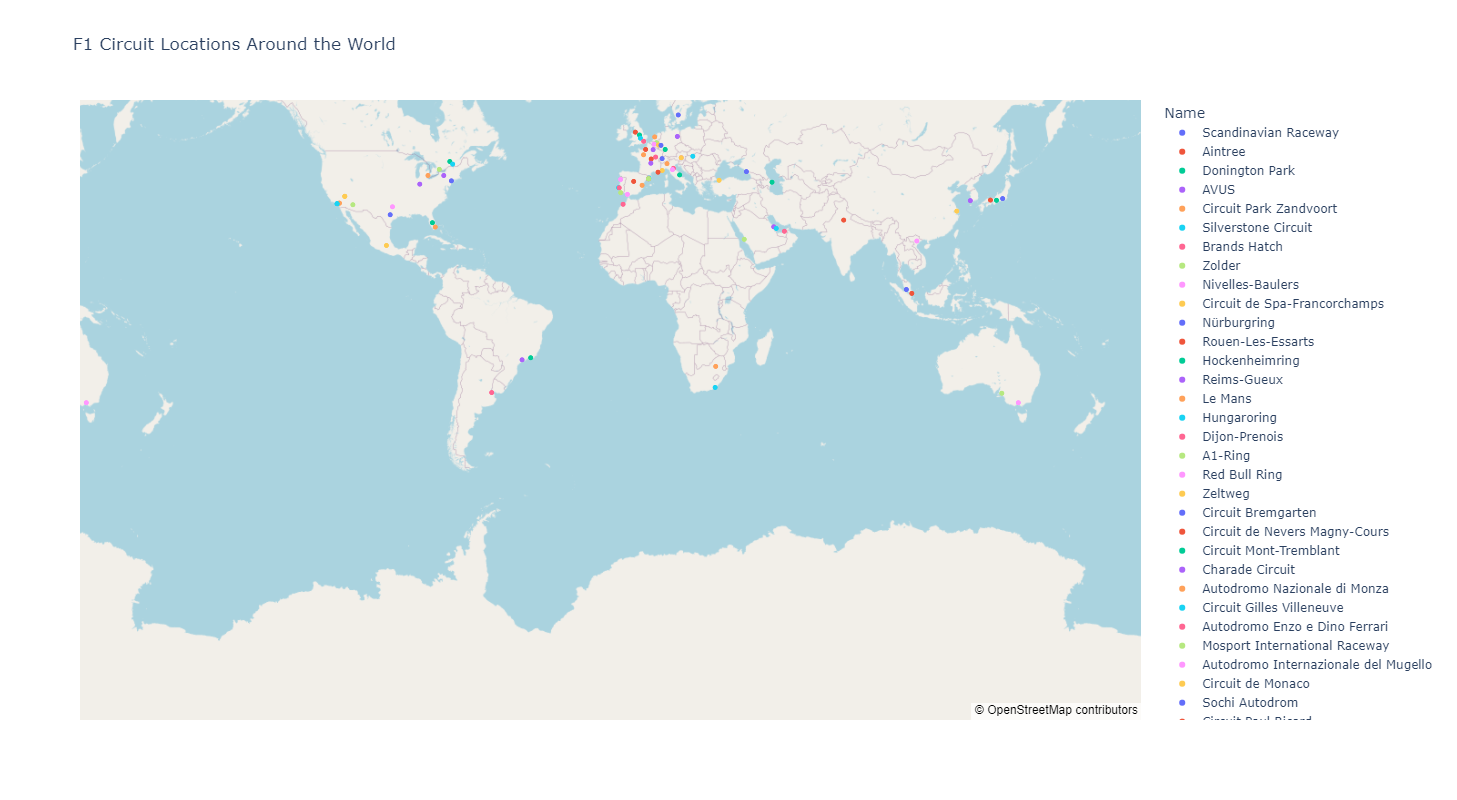

In [251]:
# create a scatter mapbox of all F1 circuits in the world with zoom in capability to view the race tracks
map_df=px.scatter_mapbox(
        data_frame= master_circuits,
        lat = 'Latitude',
        lon = 'Longitude',
        color = 'Name',
        mapbox_style = 'open-street-map',
        zoom = 1,
        size_max = 20,
        height = 800,
        width = 1450,
        hover_data = ['Last length used','Season(s)','N. races', 'Direction', 'Type'],
        title = 'F1 Circuit Locations Around the World'
            )

map_df

In [129]:
# Read historical race results from URL
f1_stats=pd.read_html('https://en.everybodywiki.com/List_of_Formula_One_podium_finishers')

In [449]:
# Create dataframe from the webpage
podium=f1_stats[3]
podium

,Rank,Country,Driver,Podiums,Seasons active,First podium,Last podium
0,1,Germany,Michael Schumacher,155,1991–20062010–2012,1992 Belgian Grand Prix,2012 European Grand Prix
1,2,United Kingdom,Lewis Hamilton,132,2007–,2007 Australian Grand Prix,2018 United States Grand Prix
2,3,Germany,Sebastian Vettel,110,2007–,2008 Italian Grand Prix,2018 Mexican Grand Prix
3,4,France,Alain Prost,106,1980–19911993,1981 Argentine Grand Prix,1993 Australian Grand Prix
4,5,Finland,Kimi Räikkönen,102,2001–20092012–,2002 Australian Grand Prix,2018 Mexican Grand Prix
...,...,...,...,...,...,...,...
205,142,United Kingdom,Trevor Taylor,1,19591961–19641966,1962 Dutch Grand Prix,1962 Dutch Grand Prix
206,142,United States,Johnny Thomson,1,1953–19601978,1959 Indianapolis 500,1959 Indianapolis 500
207,142,United States,Lee Wallard,1,1950–1951,1951 Indianapolis 500,1951 Indianapolis 500
208,142,United Kingdom,Peter Whitehead,1,1950–1951,1950 French Grand Prix,1950 French Grand Prix


In [484]:
# Create new dataframe for plot
by_country=podium.loc[:,['Country','Podiums']].groupby('Country').sum().reset_index().sort_values('Podiums',ascending=True)
by_country

,Country,Podiums
27,Venezuela,1
19,Rhodesia,1
18,Portugal,1
14,Monaco,1
7,Denmark,1
20,Russia,3
12,Japan,3
17,Poland,12
13,Mexico,15
15,Netherlands,22


<AxesSubplot:title={'center':'Number of F1 Podium Finishes by Country (1950 - 2018)'}, ylabel='Country'>

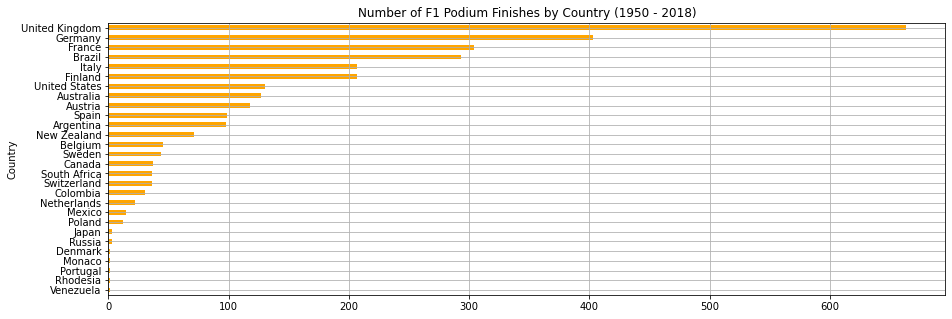

In [508]:
# Plot horizontal bar chart of number of wins by country
plot_by_country = by_country.plot.barh(title='Number of F1 Podium Finishes by Country (1950 - 2018)',y='Podiums',x='Country', figsize=(15,5), legend=False, color='orange', grid=True)
plot_by_country

In [486]:
# Create new dataframe for plot
by_driver=podium.loc[:,['Driver','Podiums']].groupby('Driver').sum().reset_index().sort_values('Podiums',ascending=True)
by_driver

,Driver,Podiums
0,Aguri Suzuki,1
133,Mike Nazaruk,1
135,Mike Spence,1
137,Nelson Piquet Jr.,1
54,Hans Herrmann,1
...,...,...
103,Kimi Räikkönen,102
1,Alain Prost,106
183,Sebastian Vettel,110
106,Lewis Hamilton,132


<AxesSubplot:title={'center':'Number of F1 Podium Finishes by Driver (1950 - 2018)'}, ylabel='Driver'>

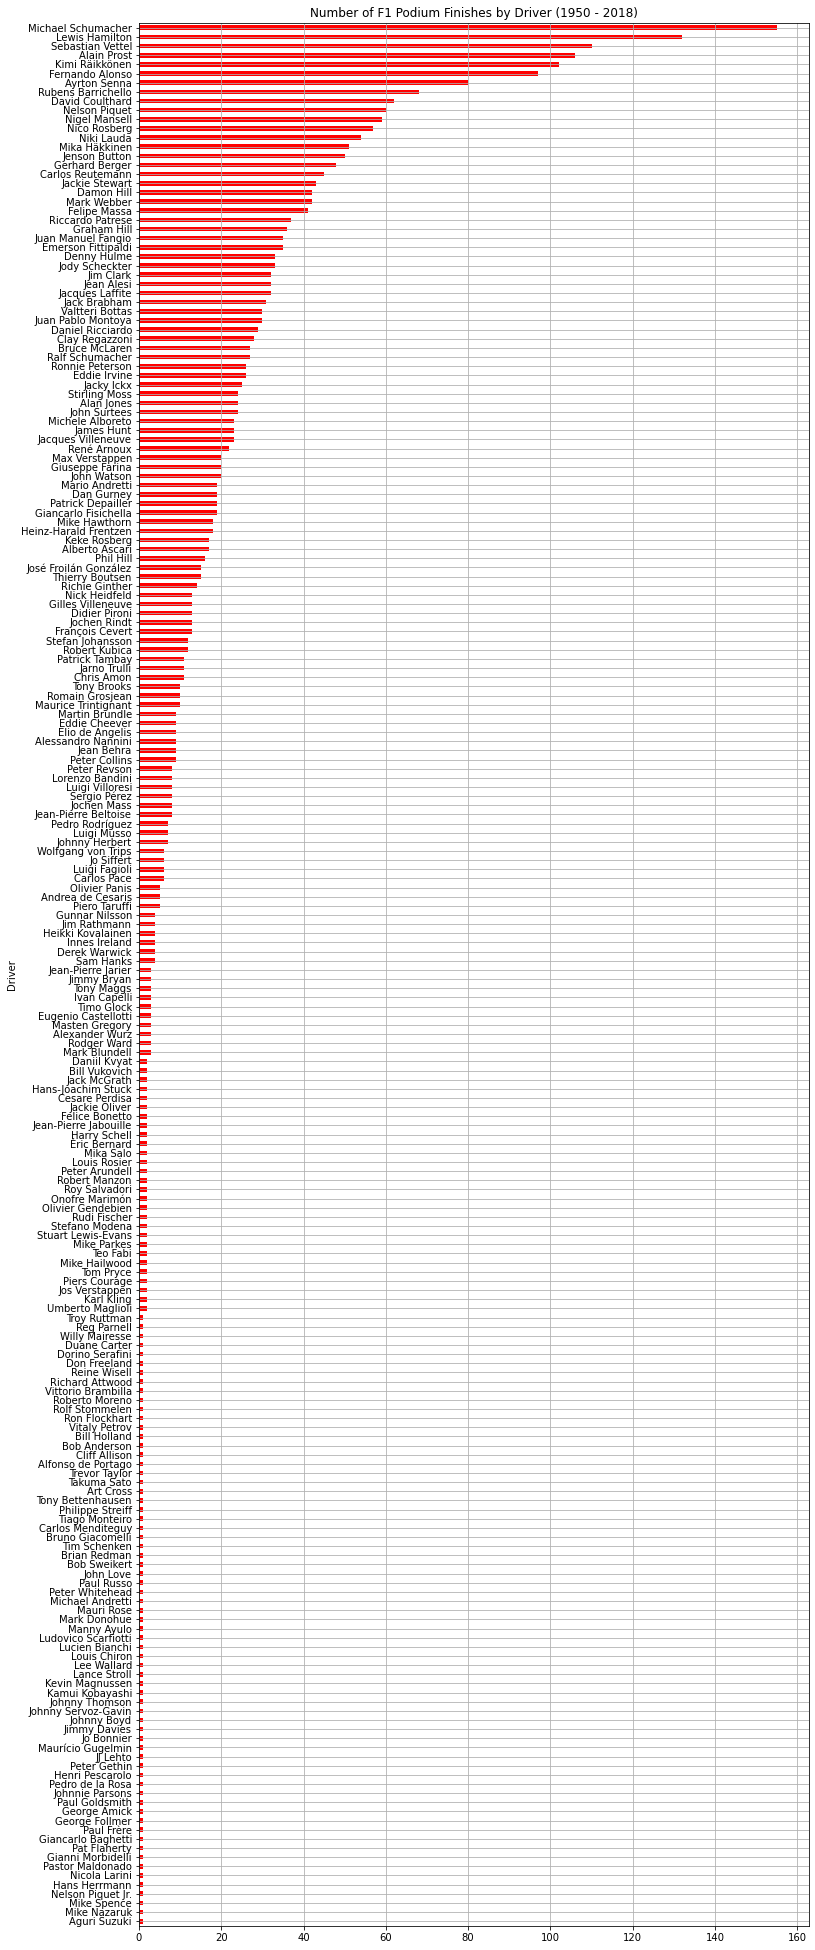

In [507]:
# Plot horizontal bar chart of number of wins by driver
plot_by_driver = by_driver.plot.barh(title='Number of F1 Podium Finishes by Driver (1950 - 2018)',y='Podiums',x='Driver', figsize=(12,35), legend=False, color='red', grid=True)
plot_by_driver